# Hardware specifications of the colab Notebook

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   23G   86G  21% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        62G   40G   23G  65% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

# Importing the pre-requisites

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#installing H2O AutoML
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o

In [ ]:
#Starts the H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 mins 48 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_8urimm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.160 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML
from h2o.estimators import H2OKMeansEstimator

# Exploratory Data Analysis

In [ ]:
df_data = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_data.shape

(7043, 21)

In [ ]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in the dataset

([<matplotlib.patches.Wedge at 0x7f93889ff790>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')])

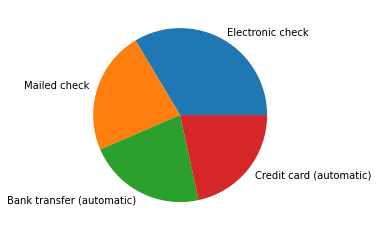

In [ ]:
plt.pie(list(df_data['PaymentMethod'].value_counts()), labels = df_data['PaymentMethod'].unique())

In [ ]:
df_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


tenure and MonthlyCharges are the only numerical features present in the dataset, Converting TotalCharges to numerical data

In [ ]:
df_data['TotalCharges'] = df_data['TotalCharges'].str.strip()
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'])

In [ ]:
numerical_data = df_data[['tenure','MonthlyCharges', 'TotalCharges']]

In [ ]:
from sklearn import preprocessing

x = numerical_data.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
scaled_num_data = pd.DataFrame(x_scaled, columns = numerical_data.columns)

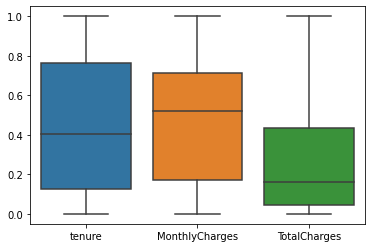

In [ ]:
box_plot_1 = sns.boxplot(data = scaled_num_data[["tenure", "MonthlyCharges", "TotalCharges"]])

In [ ]:
heatmap_data = df_data.drop(['customerID', 'Churn'], axis=1)
heatmap_data_copy = heatmap_data

In [ ]:
heatmap_data_copy.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [ ]:
encoder = preprocessing.LabelEncoder()
cat_data = heatmap_data_copy.select_dtypes(include=object)

In [ ]:
cat_data = cat_data.apply(encoder.fit_transform)

In [ ]:
heatmap_data_copy[cat_data.columns] = cat_data
heatmap_data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


# Churn Data Preprocessing and H2O model training (Using the given dataset without data preprocessing)

In [ ]:
churn_df = h2o.import_file("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
#taking the test, train and validation data respectively
churn_train, churn_test, churn_valid = churn_df.split_frame(ratios = [.7, .15])

In [ ]:
print("training set shape: ", churn_train.shape)
print("test set shape: ", churn_test.shape)
print("validation set shape: ", churn_valid.shape)

training set shape:  (4965, 21)
test set shape:  (1042, 21)
validation set shape:  (1036, 21)


In [ ]:
auto_model = H2OAutoML(max_models = 10, seed = 10, exclude_algos= ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds = 0)
#use a maximum of 10 models-the more models the more time consuming it is
#exclude_algos disables the alogs mentioned in it
#nfolds takes the number of folds that is required to perform k-fold cross validation, took zero as we have a validation dataset, by default takes 5 

In [ ]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
auto_model.train(x = x, y = y, training_frame = churn_train, validation_frame = churn_valid)

AutoML progress: |
05:59:12.32: Project: AutoML_2_20221031_55912
05:59:12.32: Cross-validation disabled by user: no fold column nor nfolds > 1.
05:59:12.32: Setting stopping tolerance adaptively based on the training frame: 0.014191894485359773
05:59:12.32: Build control seed: 10
05:59:12.32: training frame: Frame key: AutoML_2_20221031_55912_training_py_258_sid_9e89    cols: 21    rows: 4965  chunks: 8    size: 267436  checksum: -7711525218921163120
05:59:12.32: validation frame: Frame key: py_260_sid_9e89    cols: 21    rows: 1036  chunks: 8    size: 138271  checksum: -1241312863765853706
05:59:12.34: leaderboard frame: Frame key: py_260_sid_9e89    cols: 21    rows: 1036  chunks: 8    size: 138271  checksum: -1241312863765853706
05:59:12.34: blending frame: NULL
05:59:12.35: response column: Churn
05:59:12.35: fold column: null
05:59:12.35: weights column: null
05:59:12.35: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20221031_55912


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21498                  6            13           8.7           27            32            29.48

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11780033652066124
RMSE: 0.3432205362746542
LogLoss: 0.3667852543453666
Mean Per-Class Error: 0.19661921782292854
AUC: 0.8875840156065575
AUCPR: 0.7381528580890913
Gini: 0.7751680312131151

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3138521450314887
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     2935  714    0.1957   (714.0/3649.0)
Yes    260   1056   0.1976   (260.0/1316.0)
Total  3195  1770   0.1962   (974.0/4965.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.313852     0.684381  219
max f2                       0.167174     0.785209  289
max f0point5                 0.431443     0.687223  172
max accuracy                 0.431443     0.83283   172
max precision                0.924708     1         0
max recall                   0.0307708    1         377
max specificity              0.924708     1         0
max absolute_mcc             0.425842     0.564594  174
max min_per_class_accuracy   0.313852     0.802432  219
max mean_per_class_accuracy  0.256975     0.80662   243
max tns                      0.924708     3649      0
max fns                      0.924708     1313      0
max fps                      0.00746122   3649      399
max tps                      0.0307708    1316      377
max tnr                      0.924708     1         0
max fnr                      0.924708     0.99772   0
max fpr                      0.00746122   1         399
max tpr                      0.0307708    1         377

Gains/Lift Table: Avg response rate: 26.51 %, avg score: 26.52 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102719                   0.885013           3.62484    3.62484            0.960784         0.898572   0.960784                    0.898572            0.037234        0.037234                   262.484   262.484            0.0366859
2        0.021148                    0.861051           3.5632     3.59314            0.944444         0.872986   0.952381                    0.885414            0.0387538       0.0759878                  256.32    259.314            0.0746176
3        0.0300101                   0.844266           3.25832    3.49427            0.863636         0.853249   0.926174                    0.875915            0.0288754       0.104863                   225.832   249.427            0.101849
4        0.0400806                   0.810423           3.32006    3.4505             0.88             0.831063   0.914573                    0.864646            0.0334347       0.138298                   232.006   245.05             0.133639
5        0.0501511                   0.776633           3.54643    3.46976            0.94             0.791406   0.919679                 

In [ ]:
lb = auto_model.leaderboard 

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_2_20221031_55912,0.869139,0.387599,0.687324,0.199213,0.353047,0.124642
GLM_1_AutoML_2_20221031_55912,0.867469,0.391642,0.686517,0.196123,0.354574,0.125722
GBM_2_AutoML_2_20221031_55912,0.865732,0.391807,0.690284,0.203265,0.356057,0.126776
XGBoost_3_AutoML_2_20221031_55912,0.863552,0.393452,0.687573,0.211205,0.3561,0.126807
GBM_3_AutoML_2_20221031_55912,0.861319,0.395457,0.693248,0.204949,0.356297,0.126947
GBM_4_AutoML_2_20221031_55912,0.860898,0.397928,0.68684,0.208904,0.356662,0.127208
DRF_1_AutoML_2_20221031_55912,0.855167,0.462702,0.674486,0.209617,0.360295,0.129812
XGBoost_1_AutoML_2_20221031_55912,0.854041,0.408549,0.668134,0.226565,0.363523,0.132149
XRT_1_AutoML_2_20221031_55912,0.8501,0.411903,0.669305,0.210271,0.363883,0.132411
XGBoost_2_AutoML_2_20221031_55912,0.84568,0.421573,0.657922,0.23591,0.368252,0.135609


In [ ]:
churn_pred = auto_model.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
auto_model.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1374955995598541
RMSE: 0.37080399075502696
LogLoss: 0.41961957043671105
Mean Per-Class Error: 0.23715283785616414
AUC: 0.8445457138715213
AUCPR: 0.6586600744262623
Gini: 0.6890914277430427

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3379093236939784
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     614   147    0.1932   (147.0/761.0)
Yes    79    202    0.2811   (79.0/281.0)
Total  693   349    0.2169   (226.0/1042.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.337909     0.64127   197
max f2                       0.169143     0.762763  276
max f0point5                 0.609564     0.627178  88
max accuracy                 0.609564     0.798464  88
max precision                0.919555     1         0
max recall                   0.0245593    1         380
max specificity              0.919555     1         0
max absolute_mcc             0.337909     0.49431   197
max min_per_class_accuracy   0.298985     0.764783  218
max mean_per_class_accuracy  0.234742     0.77426   244
max tns                      0.919555     761       0
max fns                      0.919555     280       0
max fps                      0.00754119   761       399
max tps                      0.0245593    281       380
max tnr                      0.919555     1         0
max fnr                      0.919555     0.996441  0
max fpr                      0.00754119   1         399
max tpr                      0.0245593    1         380

Gains/Lift Table: Avg response rate: 26.97 %, avg score: 27.04 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105566                   0.880753           3.37108    3.37108            0.909091         0.894927   0.909091                    0.894927            0.0355872       0.0355872                  237.108   237.108            0.0342731
2        0.0201536                   0.858895           2.59573    3.00186            0.7              0.872481   0.809524                    0.884239            0.024911        0.0604982                  159.573   200.186            0.055242
3        0.0307102                   0.843296           3.03397    3.0129             0.818182         0.853104   0.8125                      0.873536            0.0320285       0.0925267                  203.397   201.29             0.0846423
4        0.0403071                   0.802766           3.33737    3.09015            0.9              0.822257   0.833333                    0.861327            0.0320285       0.124555                   233.737   209.015            0.115357
5        0.0508637                   0.779946           2.69686    3.00853            0.727273         0.791532   0.811321                    0.846841            0.0284698       0.153025                   169.686   200.853            0.139884
6        0.100768                    0.684641           2.70983    2.8606             0.730769         0.729855   0.771429                    0.788905            0.135231        0.288256                   170.983   186.06             0.256719
7        0.150672                    0.594392           2.28196    2.66895            0.615385         0.634368   0.719745                    0.737721            0.113879        0.402135                   128.196   166.895            0.344317
8        0.200576 

In [ ]:
churn_pred.head()

predict,No,Yes
No,0.959367,0.0406326
No,0.956829,0.0431715
No,0.905942,0.0940579
Yes,0.55603,0.44397
Yes,0.502184,0.497816
Yes,0.558986,0.441014
Yes,0.472095,0.527905
No,0.791155,0.208845
No,0.826396,0.173604
No,0.867344,0.132656


#Explainablity Interface for the H2O autoML model 

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_2_20221031_55912,0.844546,0.41962,0.65866,0.237153,0.370804,0.137496,1581,0.081329,GBM
XGBoost_3_AutoML_2_20221031_55912,0.841843,0.425996,0.642601,0.229023,0.373668,0.139628,3225,0.025273,XGBoost
GLM_1_AutoML_2_20221031_55912,0.83791,0.427037,0.633611,0.235759,0.374362,0.140147,1131,0.018898,GLM
XRT_1_AutoML_2_20221031_55912,0.836778,0.430699,0.630813,0.232446,0.374953,0.14059,3210,0.070325,DRF
GBM_3_AutoML_2_20221031_55912,0.833458,0.435706,0.646263,0.240466,0.376744,0.141936,2352,0.084041,GBM
XGBoost_1_AutoML_2_20221031_55912,0.832661,0.440708,0.62894,0.243531,0.378661,0.143384,3046,0.023333,XGBoost
GBM_2_AutoML_2_20221031_55912,0.829411,0.439545,0.633978,0.235376,0.378356,0.143153,2329,0.037883,GBM
GBM_4_AutoML_2_20221031_55912,0.826245,0.446805,0.634647,0.251799,0.38051,0.144788,2164,0.0757,GBM
XGBoost_2_AutoML_2_20221031_55912,0.824016,0.454392,0.614327,0.236143,0.3845,0.14784,2439,0.021354,XGBoost
DRF_1_AutoML_2_20221031_55912,0.820963,0.509345,0.624256,0.249527,0.38105,0.145199,3819,0.105115,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_2_20221031_55912

,No,Yes,Error,Rate
No,614.0,147.0,0.1932,(147.0/761.0)
Yes,79.0,202.0,0.2811,(79.0/281.0)
Total,693.0,349.0,0.2169,(226.0/1042.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

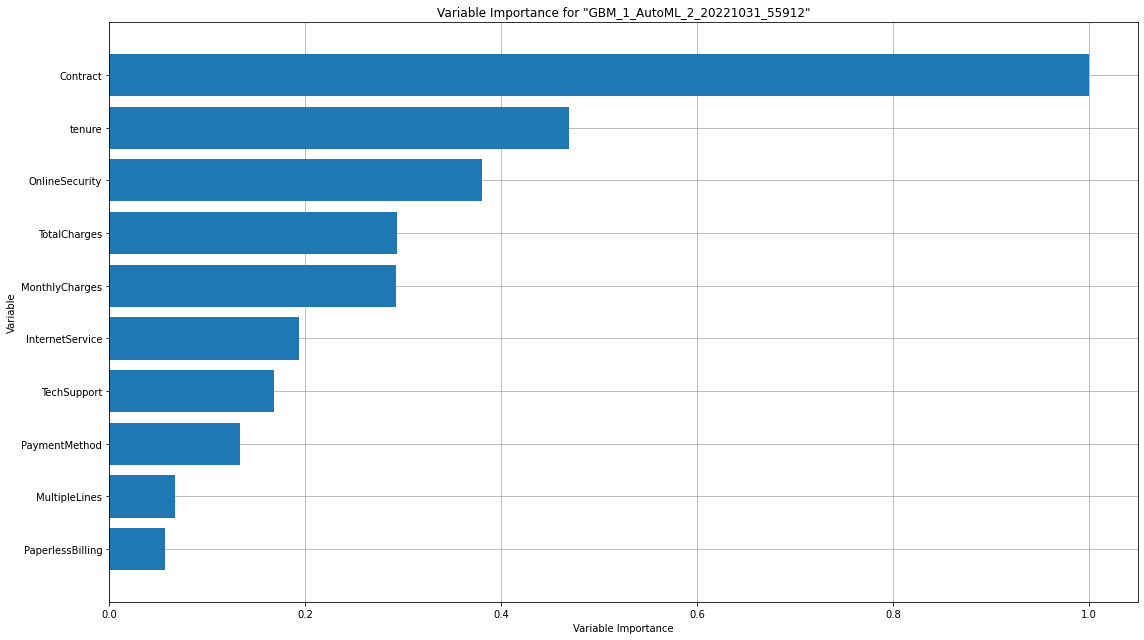

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

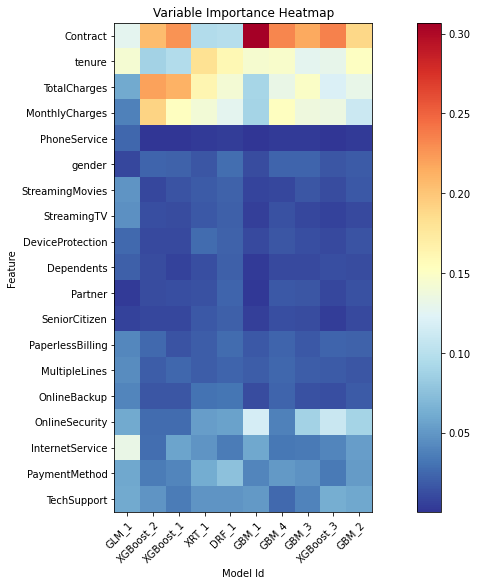

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

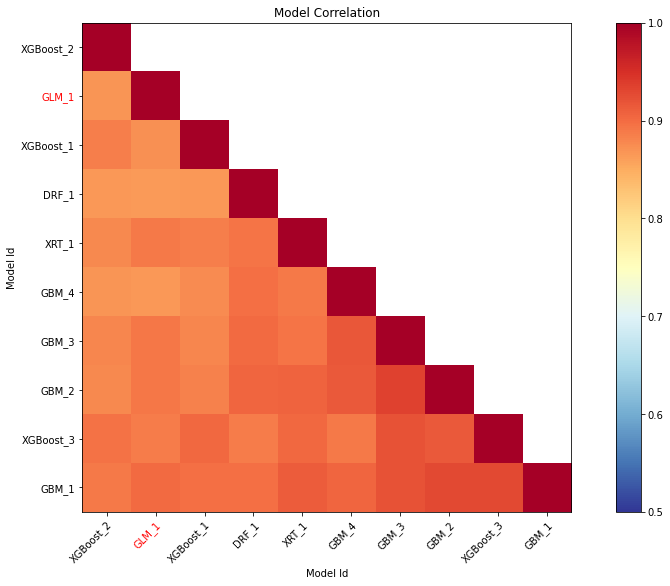

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

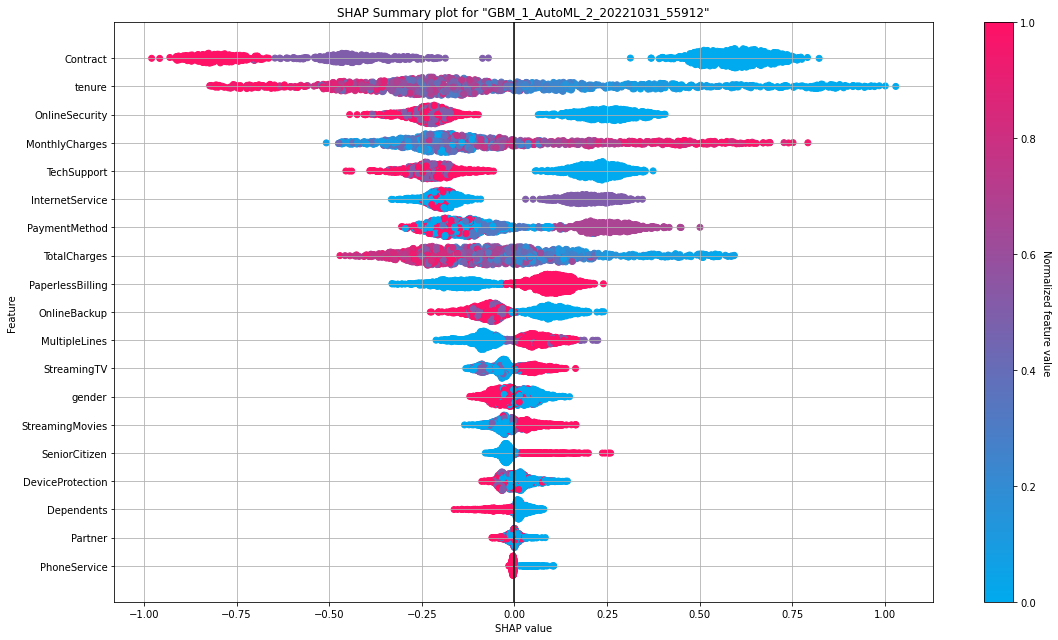

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

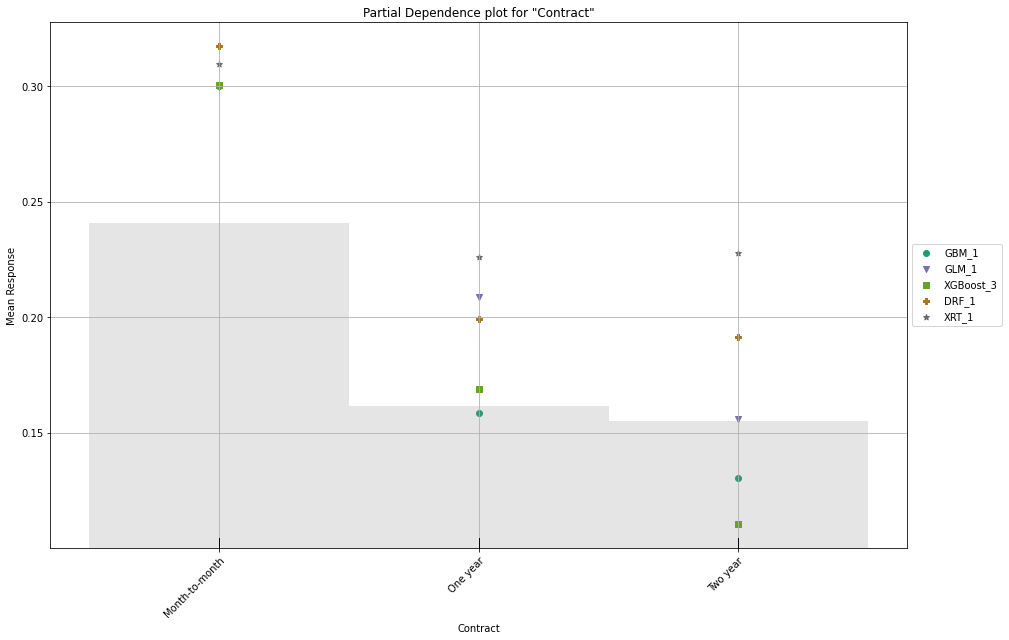

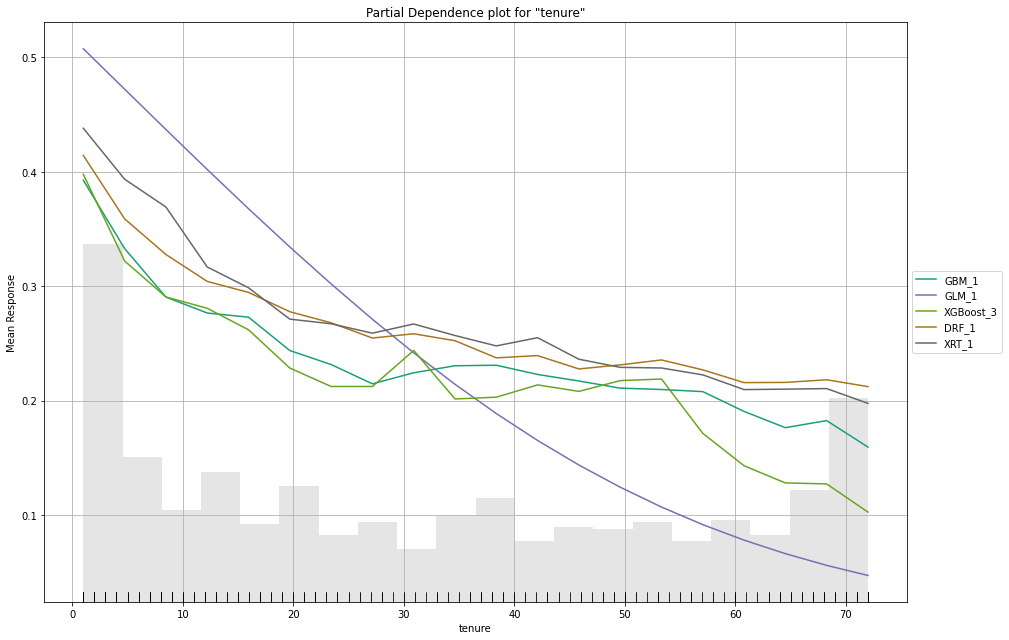

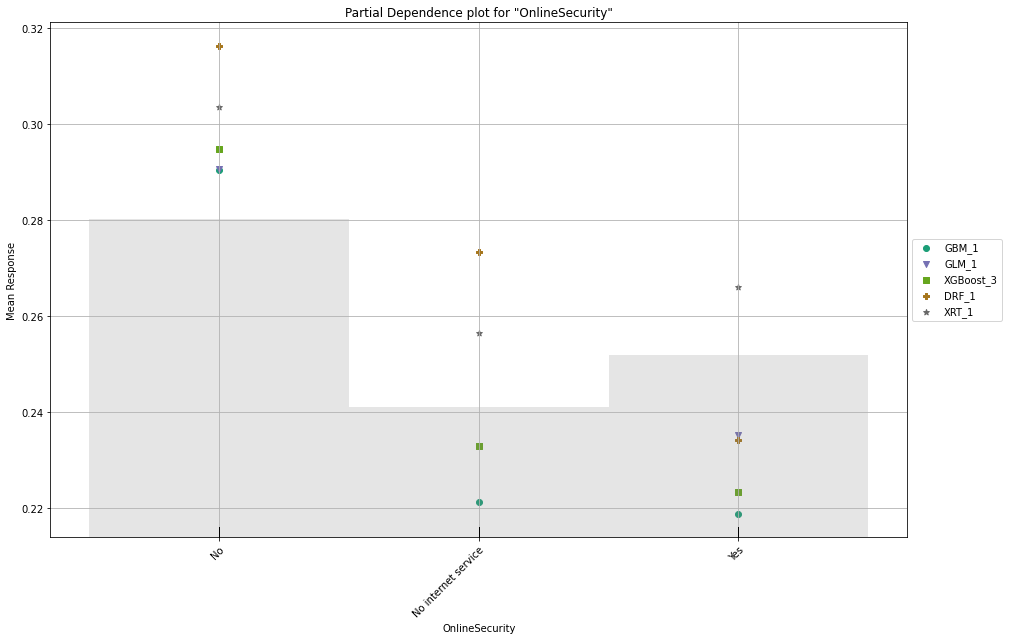

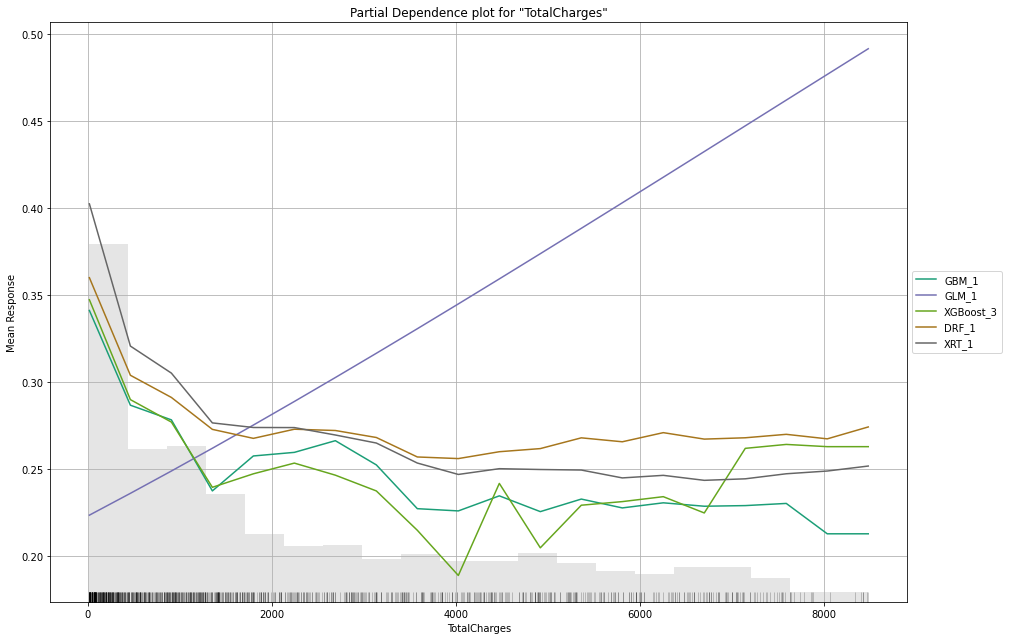

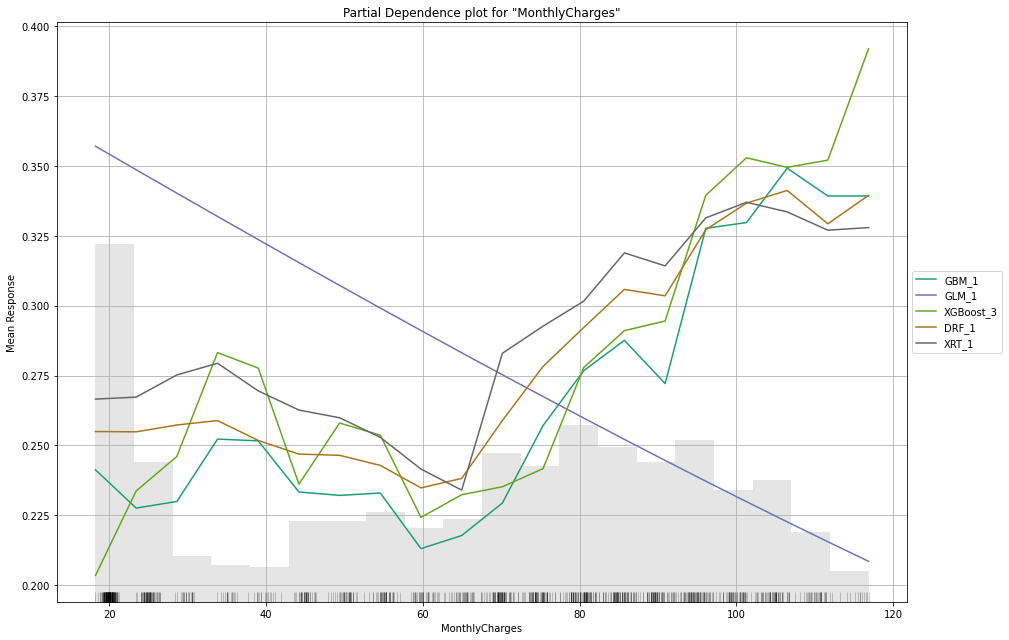

In [ ]:
exa = auto_model.explain(churn_test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_2_20221031_55912

,No,Yes,Error,Rate
No,614.0,147.0,0.1932,(147.0/761.0)
Yes,79.0,202.0,0.2811,(79.0/281.0)
Total,693.0,349.0,0.2169,(226.0/1042.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

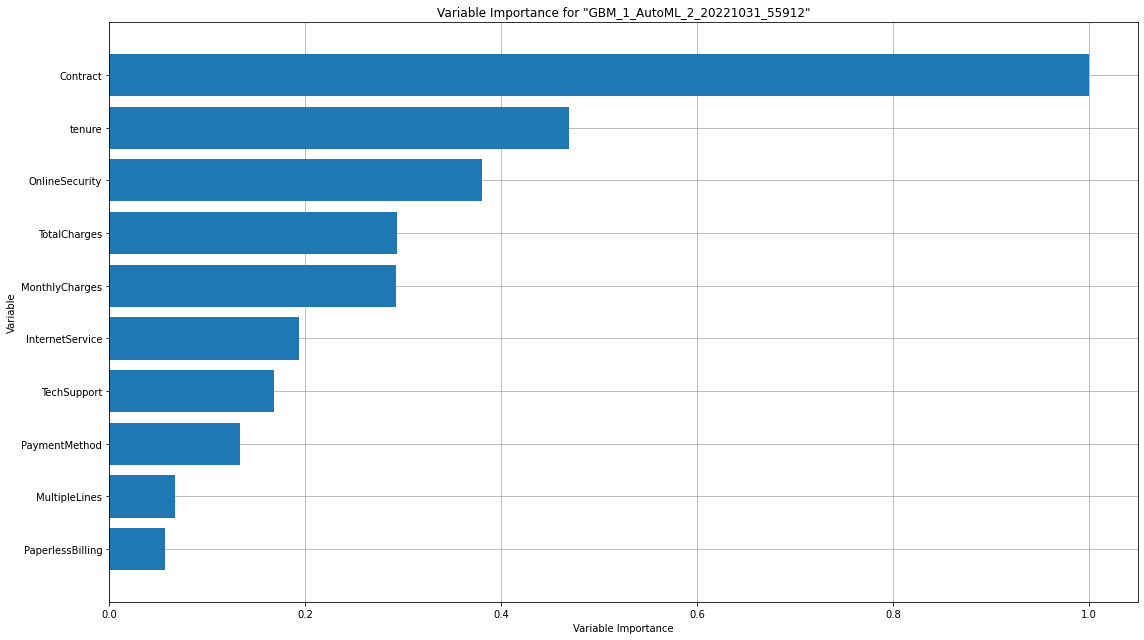

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

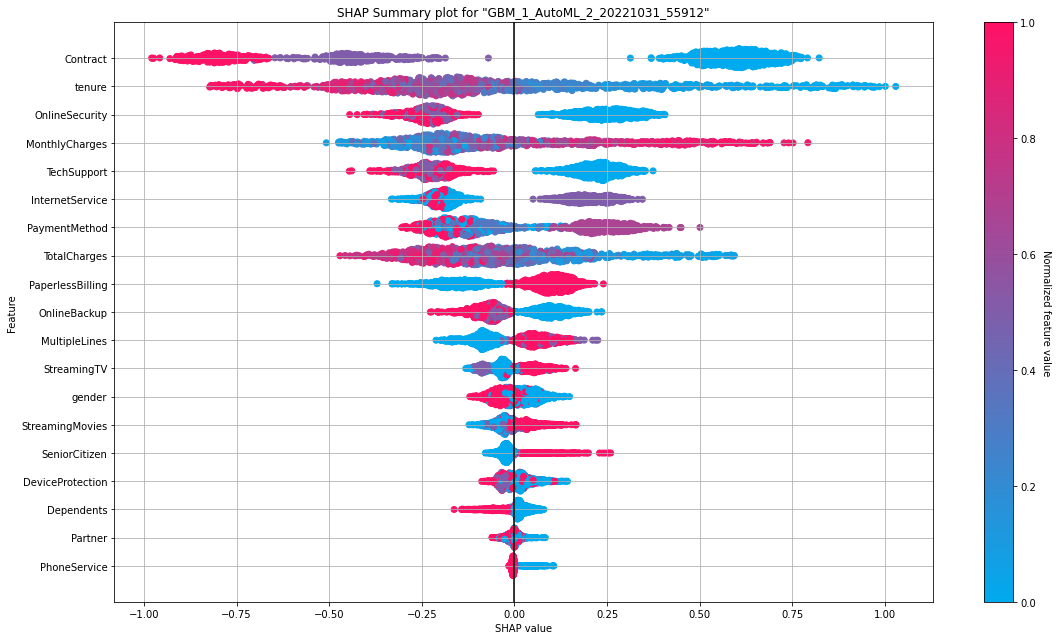

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

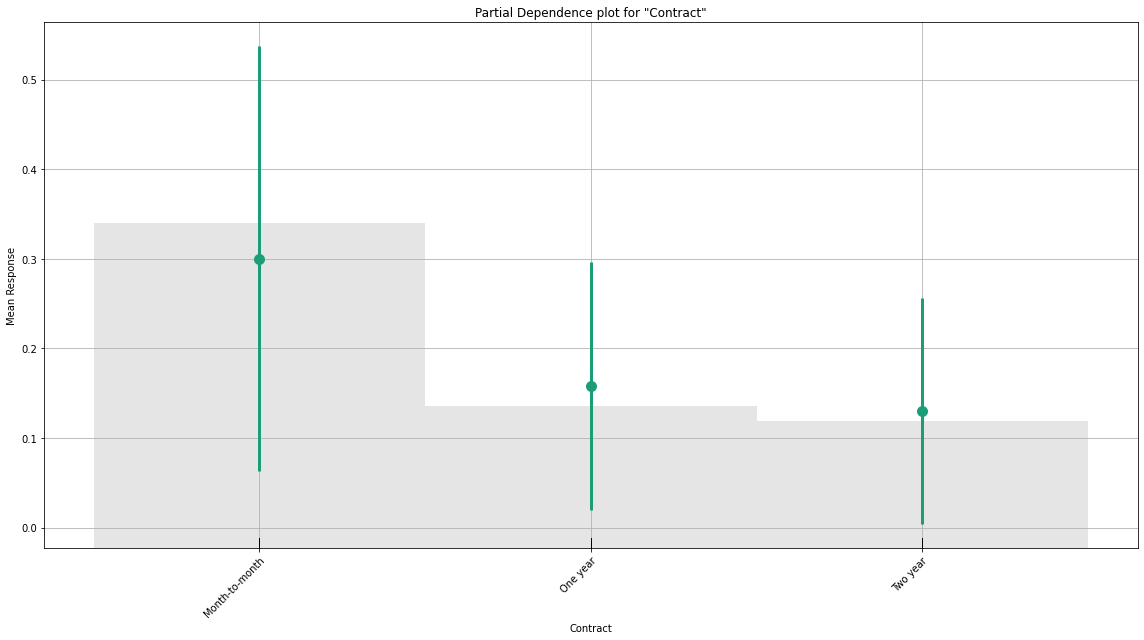

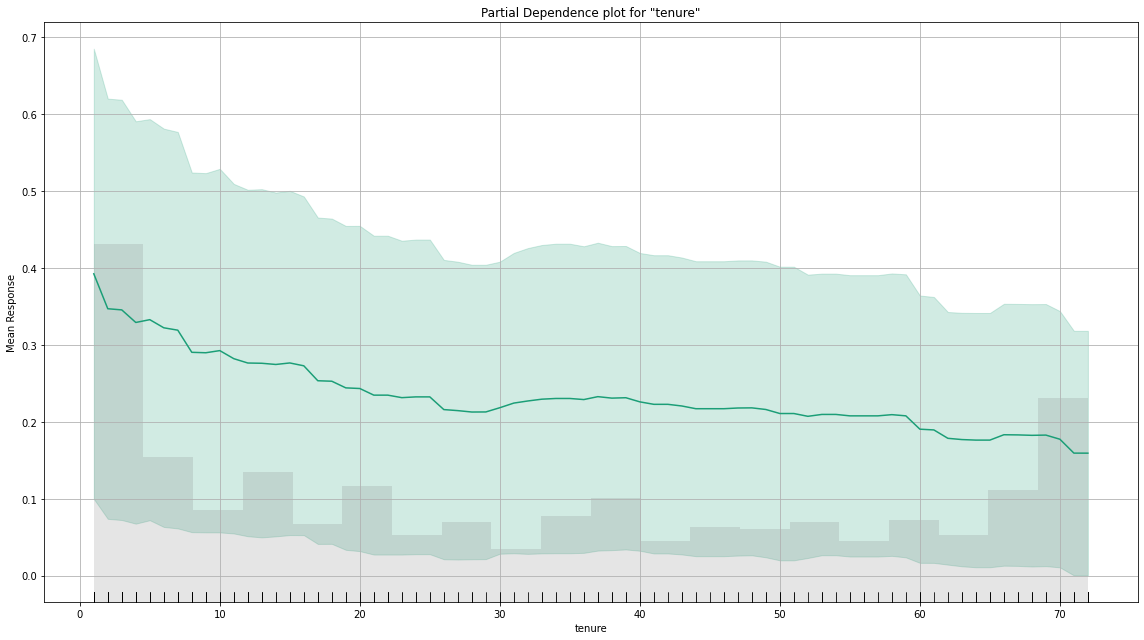

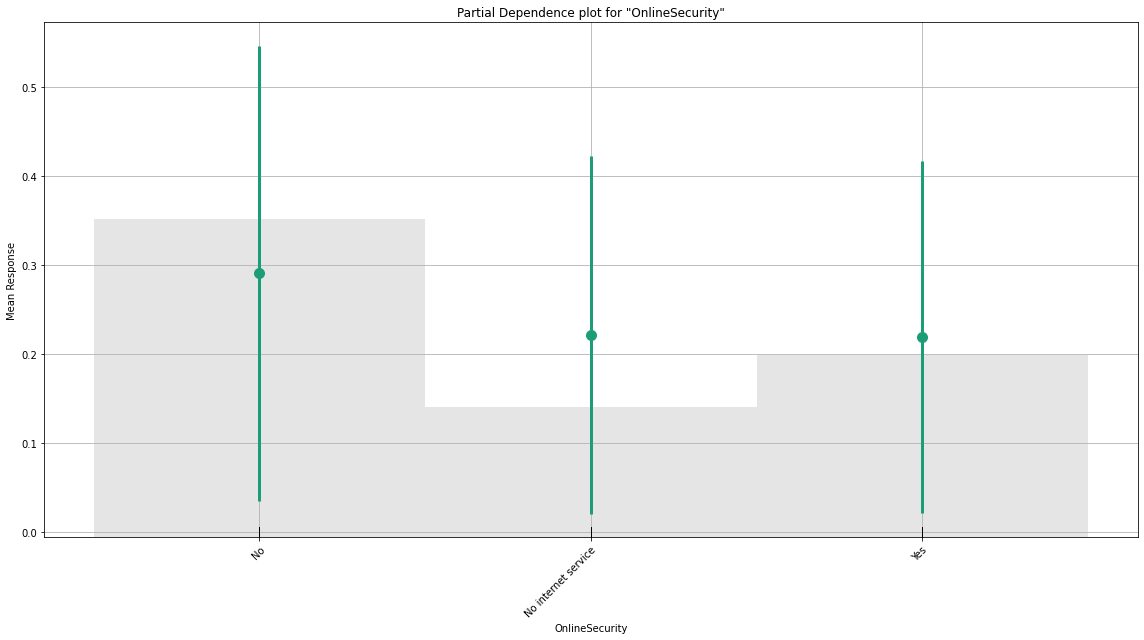

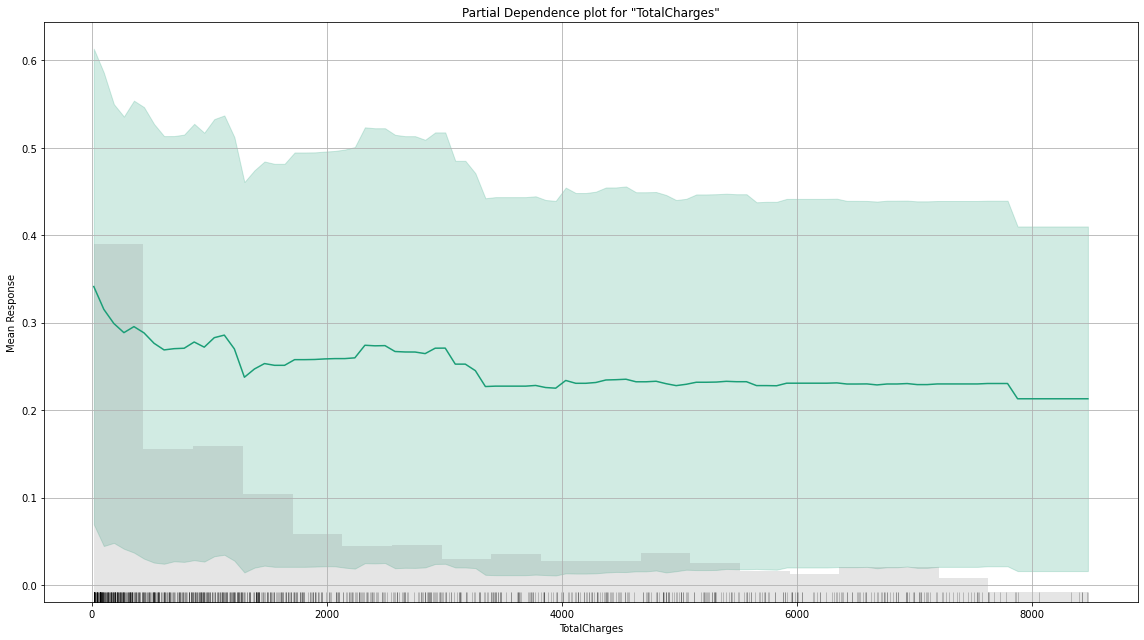

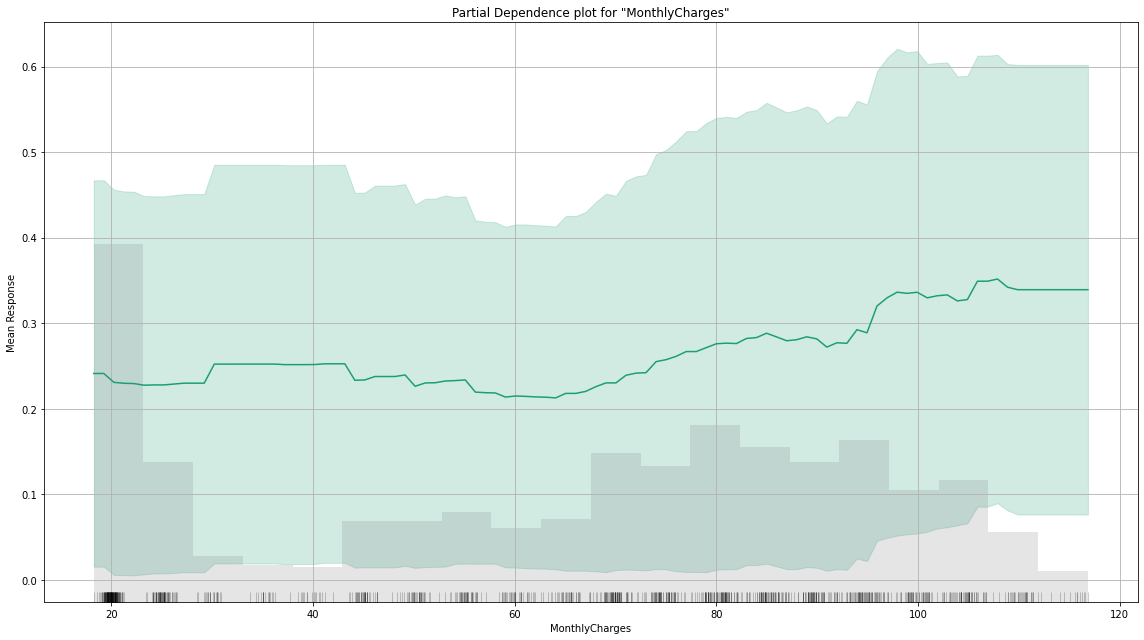

In [ ]:
#interpretation of the best model results from the leaderboard
exa_leader = auto_model.leader.explain(churn_test)

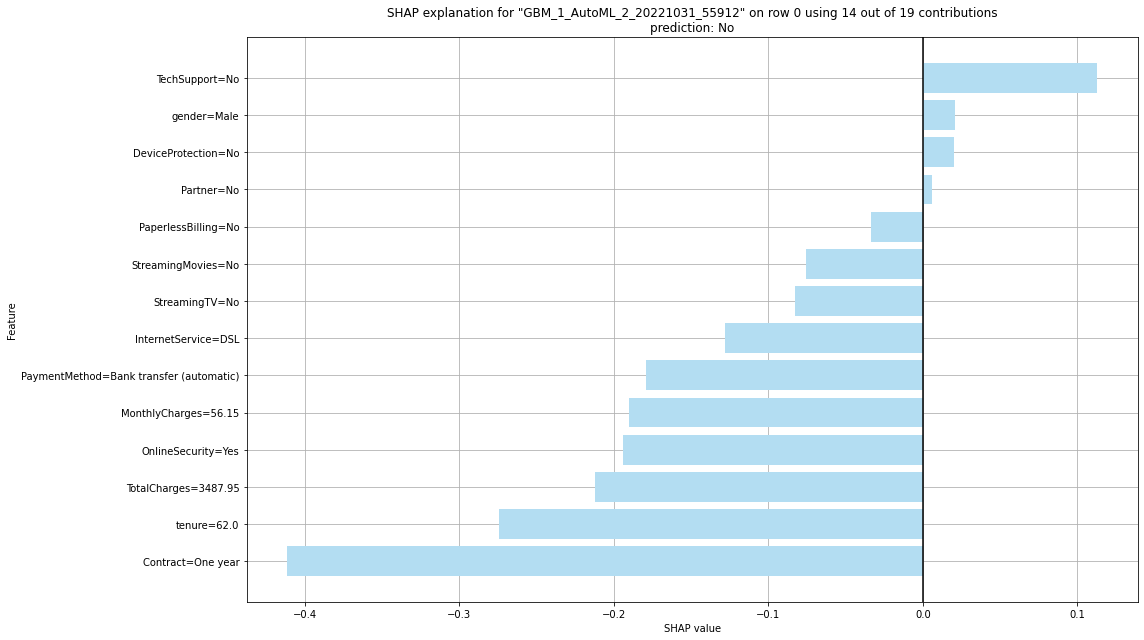

In [ ]:
shapr_plot = auto_model.leader.shap_explain_row_plot(churn_test, row_index = 0) #SHAP local explanation row plot

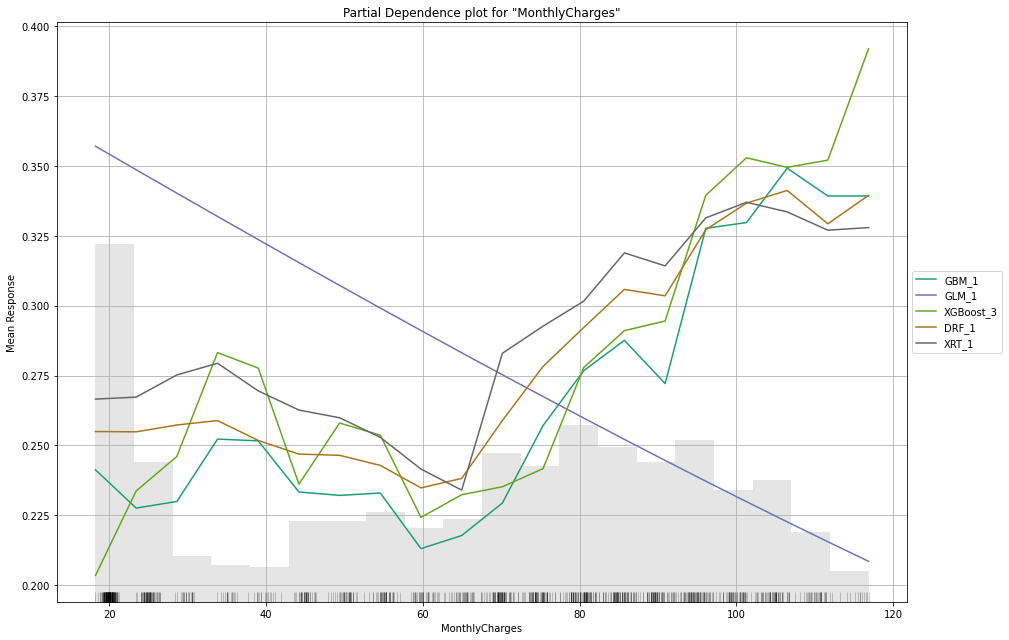

In [ ]:
#PDP plot for the autoML model for single column, Monthly Charges
pd_plot = auto_model.pd_multi_plot(churn_test, "MonthlyCharges")

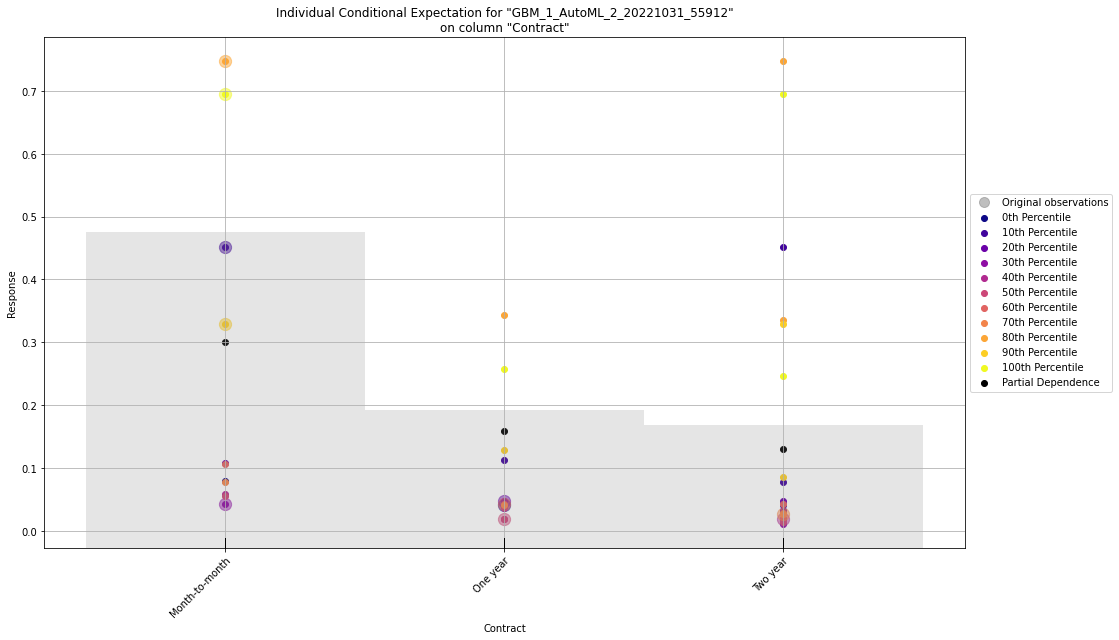

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "Contract")

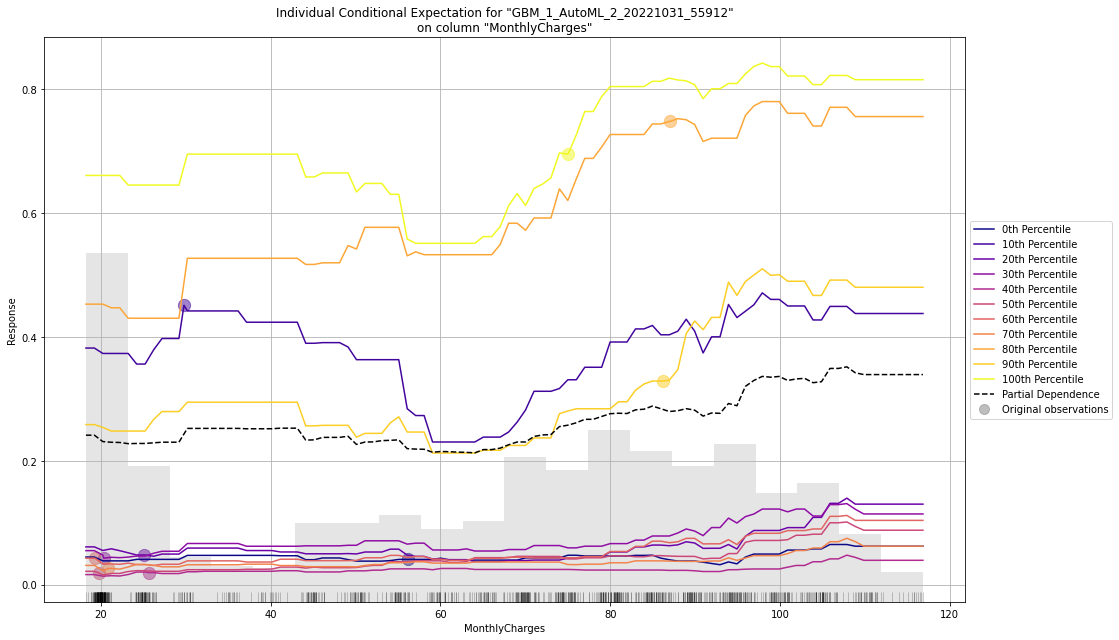

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "MonthlyCharges") #ICE (Individual Conditional Expectation) plots for the column MonthlyCharges

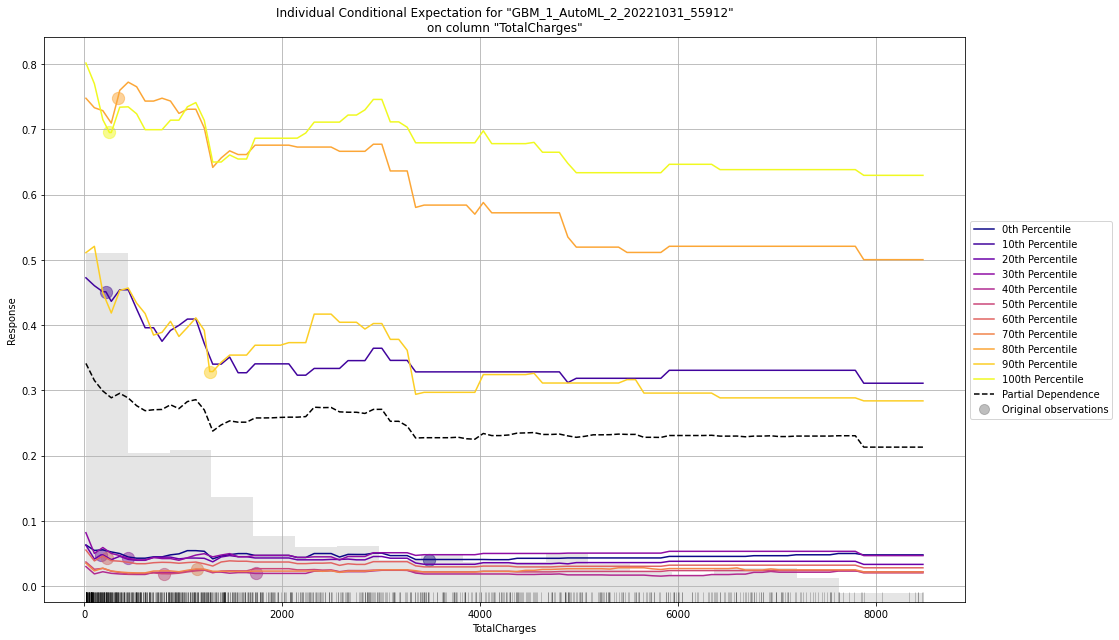

In [ ]:
ice_plot = auto_model.leader.ice_plot(churn_test, "TotalCharges")

# Churn Prediction and Interpretation using Data Preprocessing

In [ ]:
heatmap_data_copy['Churn'] = df_data['Churn']
heatmap_data_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


In [ ]:
heatmap_data_copy.to_csv("churnfile.csv")

In [ ]:
churn_df_p = h2o.import_file("churnfile.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df_p.describe()

Rows:7043
Cols:21

,C1,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.25,18.8,
mean,3521.0,0.504756495811444,0.1621468124378816,0.4830327985233565,0.2995882436461735,32.37114865824224,0.9031662643759761,0.9405083061195513,0.8729234701121681,0.7900042595484876,0.906431918216669,0.904444128922334,0.7971035070282553,0.98537555019168,0.9924747976714468,0.6904728098821525,0.5922192247621753,1.574329121113162,64.76169246059916,2283.3004408418656,
maxs,7042.0,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,118.75,8684.8,
sigma,2033.2833053954878,0.5000128736471514,0.36861160561001305,0.49974751071998724,0.45811016751001526,24.559481023094456,0.29575223178363474,0.9485540334470453,0.7377963405848539,0.859847504351883,0.8801624706484423,0.8799488523681205,0.8615505621474112,0.8850018638488104,0.8850907112876594,0.8337552328756319,0.4914569240494068,1.0681040055096733,30.090047097678497,2266.771361883145,
zeros,1,3488,5901,3641,4933,11,682,3390,2421,3498,3088,3095,3473,2810,2785,3875,2872,1544,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,No
1,1.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.5,No
2,2.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,Yes


In [ ]:
#taking the test, train and validation data respectively
train, test, valid = churn_df_p.split_frame(ratios = [.7, .15])

In [ ]:
auto_model_2 = H2OAutoML(max_models = 15, seed = 10, exclude_algos= ["DeepLearning"], verbosity="info", nfolds = 0)
#use a maximum of 10 models-the more models the more time consuming it is
#exclude_algos disables the alogs mentioned in it
#nfolds takes the number of folds that is required to perform k-fold cross validation, took zero as we have a validation dataset, by default takes 5 

In [ ]:
y_p = "Churn"
x_p = churn_df_p.columns
x_p.remove(y_p)
x_p.remove("C1")

In [ ]:
churn_df_p.columns

['C1',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
auto_model_2.train(x = x_p, y = y_p, training_frame = train, validation_frame = valid)

AutoML progress: |
06:00:42.612: Project: AutoML_3_20221031_60042
06:00:42.612: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:00:42.612: Setting stopping tolerance adaptively based on the training frame: 0.014207641788266268
06:00:42.612: Build control seed: 10
06:00:42.612: training frame: Frame key: AutoML_3_20221031_60042_training_py_589_sid_9e89    cols: 21    rows: 4954  chunks: 8    size: 113417  checksum: -5386083218735590960
06:00:42.612: validation frame: Frame key: py_591_sid_9e89    cols: 21    rows: 1062  chunks: 8    size: 36110  checksum: -3436273232018814560
06:00:42.612: leaderboard frame: Frame key: py_591_sid_9e89    cols: 21    rows: 1062  chunks: 8    size: 36110  checksum: -3436273232018814560
06:00:42.612: blending frame: NULL
06:00:42.612: response column: Churn
06:00:42.612: fold column: null
06:00:42.612: weights column: null
06:00:42.613: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g,

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20221031_60042_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          9423                   3            3            3             6             8             7.86667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12692277651902853
RMSE: 0.3562622299922187
LogLoss: 0.3944991578077891
Mean Per-Class Error: 0.22025197564451354
AUC: 0.8641539345484157
AUCPR: 0.6949561207335878
Gini: 0.7283078690968314

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35737397896625683
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3025  627    0.1717   (627.0/3652.0)
Yes    350   952    0.2688   (350.0/1302.0)
Total  3375  1579   0.1972   (977.0/4954.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.357374     0.660882  202
max f2                       0.170434     0.758106  293
max f0point5                 0.482463     0.654314  149
max accuracy                 0.482463     0.816108  149
max precision                0.92904      1         0
max recall                   0.0208383    1         394
max specificity              0.92904      1         0
max absolute_mcc             0.357374     0.528494  202
max min_per_class_accuracy   0.301684     0.783954  227
max mean_per_class_accuracy  0.275334     0.787459  239
max tns                      0.92904      3652      0
max fns                      0.92904      1301      0
max fps                      0.0150885    3652      399
max tps                      0.0208383    1302      394
max tnr                      0.92904      1         0
max fnr                      0.92904      0.999232  0
max fpr                      0.0150885    1         399
max tpr                      0.0208383    1         394

Gains/Lift Table: Avg response rate: 26.28 %, avg score: 26.30 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100929                   0.853339           3.65272    3.65272            0.96             0.876606   0.96                        0.876606            0.0368664       0.0368664                  265.272   265.272            0.0363187
2        0.0201857                   0.812369           3.04393    3.34833            0.8              0.833082   0.88                        0.854844            0.030722        0.0675883                  204.393   234.833            0.0643025
3        0.0300767                   0.787177           3.57196    3.42187            0.938776         0.800739   0.899329                    0.837051            0.0353303       0.102919                   257.196   242.187            0.0988112
4        0.0401696                   0.760224           3.42442    3.42251            0.9              0.771191   0.899497                    0.820504            0.0345622       0.137481                   242.442   242.251            0.132004
5        0.0500606                   0.735204           2.95075    3.3293             0.77551          0.747258   0.875   

In [ ]:
lb2 = auto_model_2.leaderboard
lb2

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_3_20221031_60042_model_1,0.842976,0.414669,0.636674,0.240887,0.367944,0.135383
GBM_1_AutoML_3_20221031_60042,0.839469,0.417405,0.623169,0.243604,0.37042,0.137211
GLM_1_AutoML_3_20221031_60042,0.835449,0.420966,0.613311,0.243888,0.372633,0.138856
XGBoost_grid_1_AutoML_3_20221031_60042_model_3,0.833335,0.426588,0.608324,0.230484,0.375354,0.14089
XGBoost_grid_1_AutoML_3_20221031_60042_model_1,0.833199,0.429292,0.610366,0.240427,0.376291,0.141595
GBM_5_AutoML_3_20221031_60042,0.829655,0.429388,0.611356,0.244658,0.376551,0.141791
XGBoost_1_AutoML_3_20221031_60042,0.828657,0.437938,0.592713,0.245644,0.379249,0.143829
GBM_2_AutoML_3_20221031_60042,0.828627,0.431872,0.610379,0.243211,0.377826,0.142753
XRT_1_AutoML_3_20221031_60042,0.827268,0.430024,0.616174,0.249565,0.376068,0.141427
GBM_3_AutoML_3_20221031_60042,0.827019,0.435434,0.6148,0.249936,0.379216,0.143805


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20221031_60042_model_1,0.8578,0.413392,0.714323,0.217918,0.365452,0.133555,881,0.023295,GBM
GLM_1_AutoML_3_20221031_60042,0.854755,0.419199,0.708846,0.222561,0.368746,0.135973,744,0.018083,GLM
GBM_1_AutoML_3_20221031_60042,0.852884,0.417992,0.7102,0.21902,0.367846,0.135311,1037,0.01832,GBM
XGBoost_grid_1_AutoML_3_20221031_60042_model_2,0.848257,0.427099,0.695087,0.226878,0.371626,0.138106,822,0.010812,XGBoost
XGBoost_grid_1_AutoML_3_20221031_60042_model_3,0.847987,0.42252,0.70472,0.238722,0.369811,0.13676,1418,0.013879,XGBoost
XGBoost_3_AutoML_3_20221031_60042,0.847752,0.423504,0.706896,0.243062,0.370329,0.137143,777,0.01369,XGBoost
GBM_5_AutoML_3_20221031_60042,0.845949,0.426468,0.703604,0.232297,0.371055,0.137682,690,0.01616,GBM
GBM_2_AutoML_3_20221031_60042,0.845173,0.429079,0.6942,0.234172,0.372194,0.138529,954,0.023039,GBM
XRT_1_AutoML_3_20221031_60042,0.841082,0.434321,0.685067,0.239167,0.375779,0.14121,1753,0.030044,DRF
GBM_4_AutoML_3_20221031_60042,0.839195,0.438611,0.680572,0.239053,0.376771,0.141956,923,0.032118,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_3_20221031_60042_model_1

,No,Yes,Error,Rate
No,538.0,197.0,0.268,(197.0/735.0)
Yes,49.0,243.0,0.1678,(49.0/292.0)
Total,587.0,440.0,0.2395,(246.0/1027.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

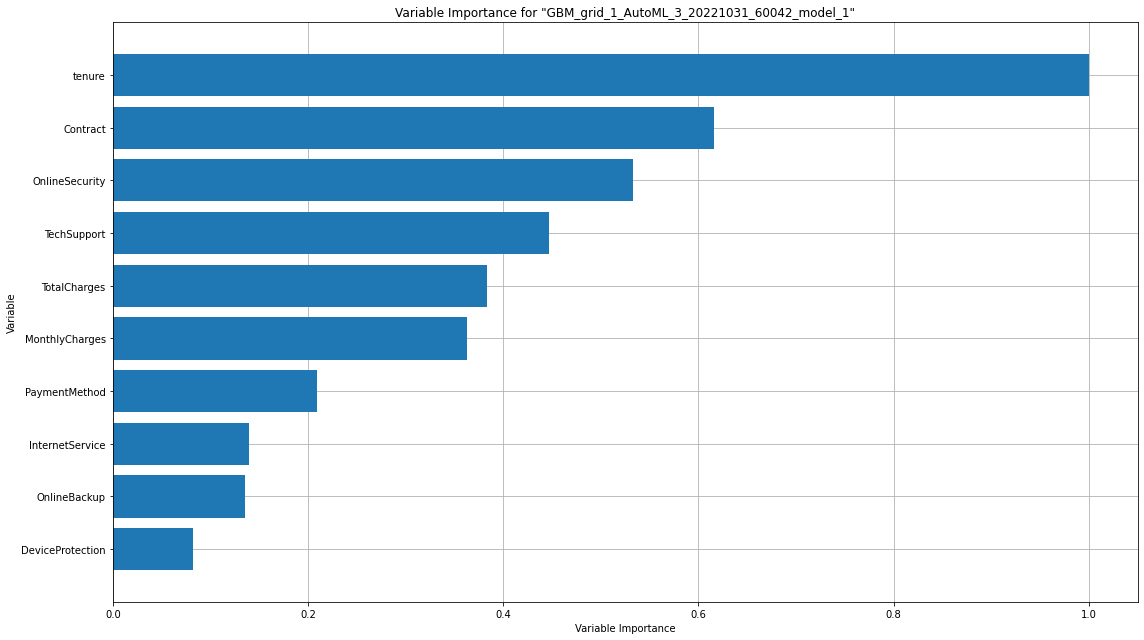

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

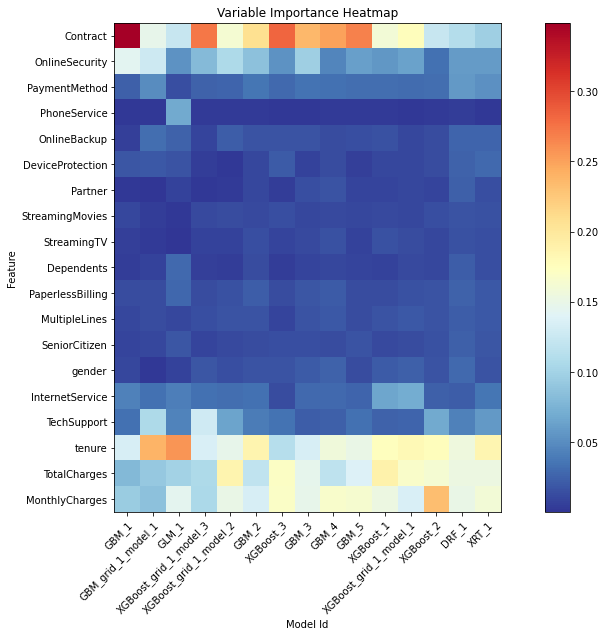

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

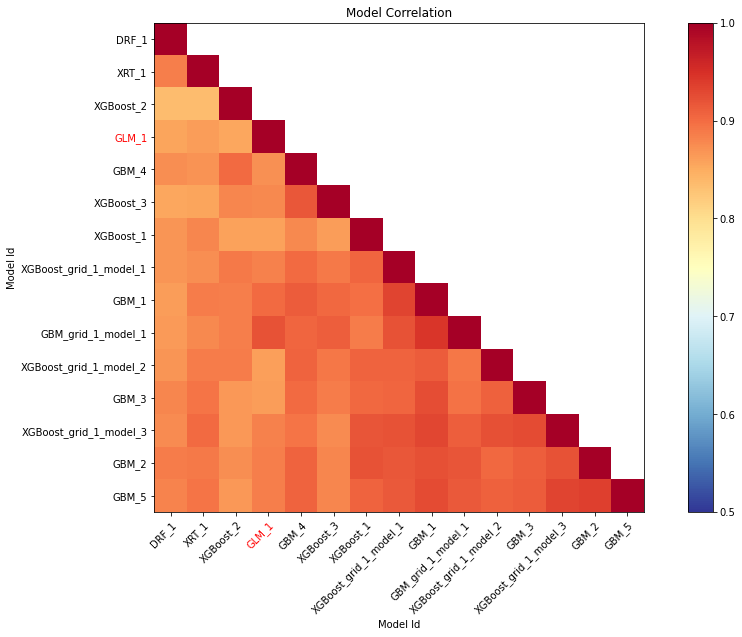

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

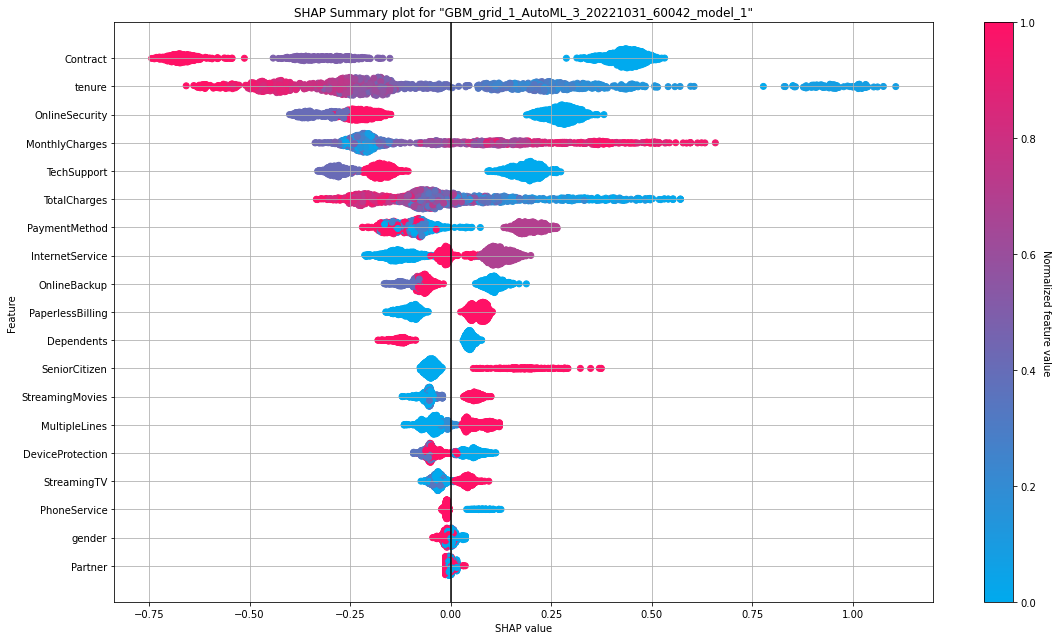

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

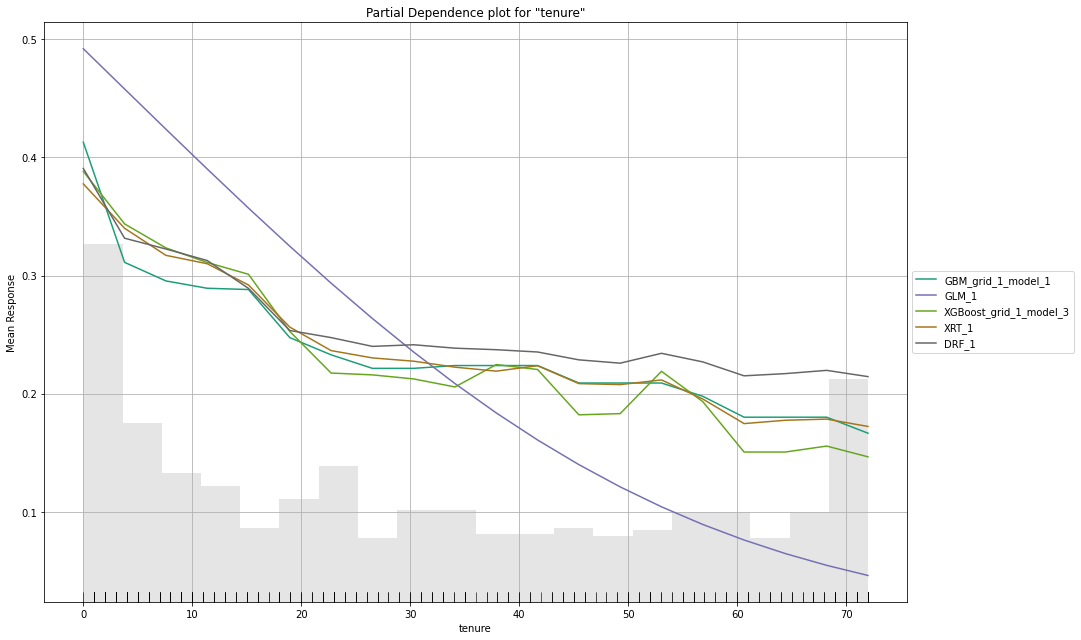

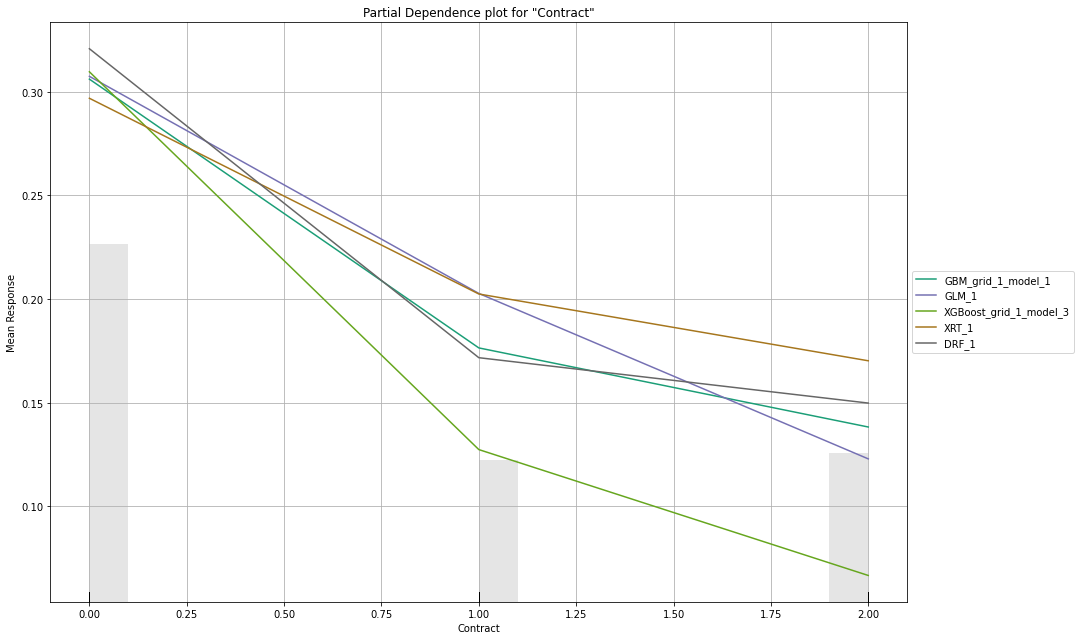

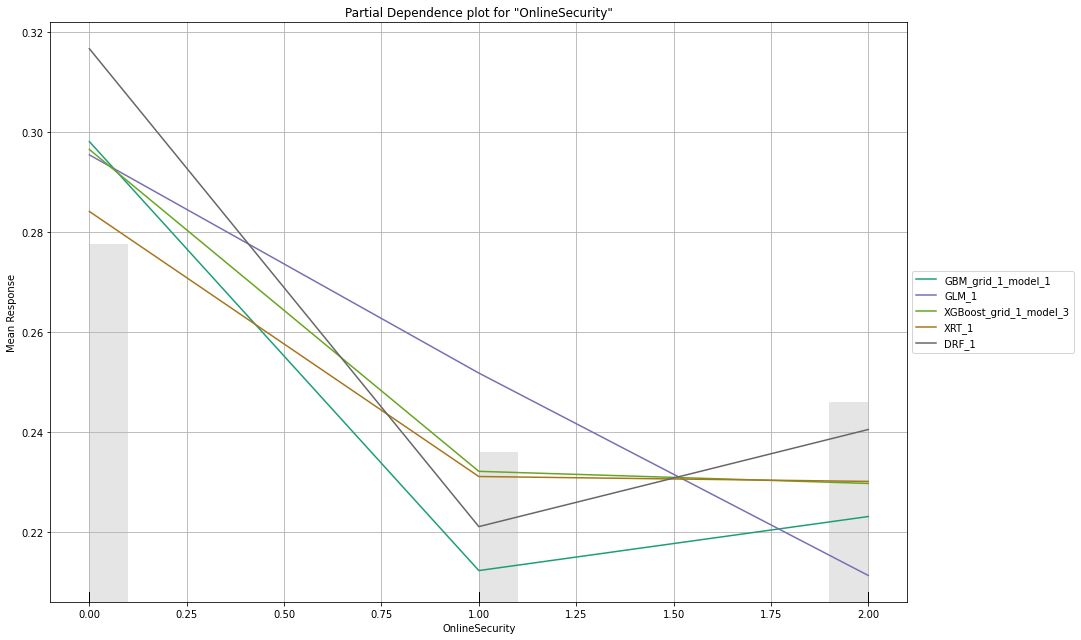

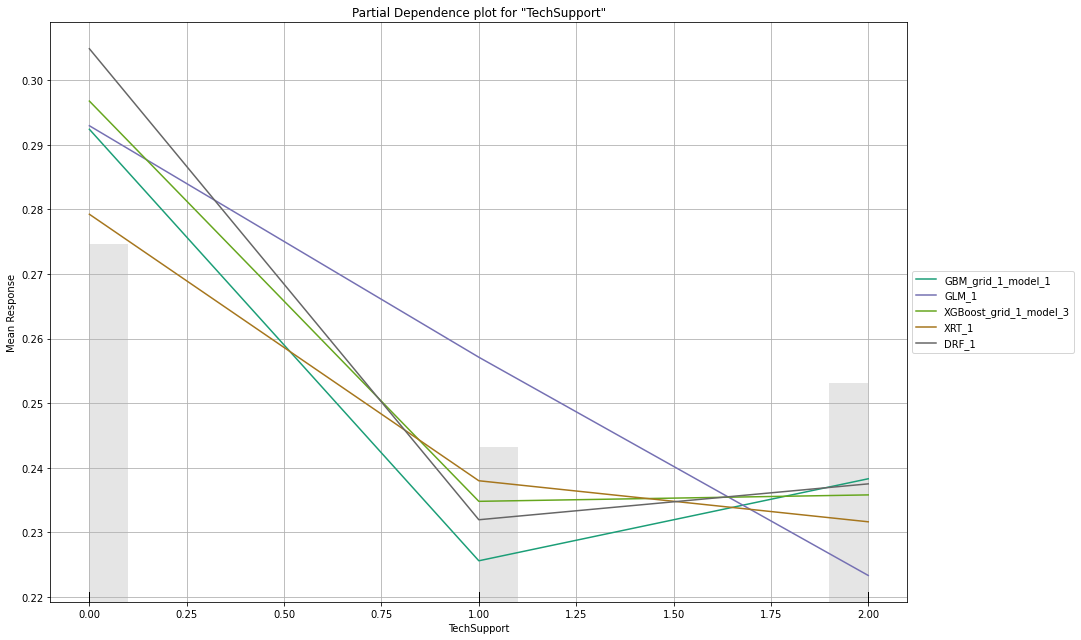

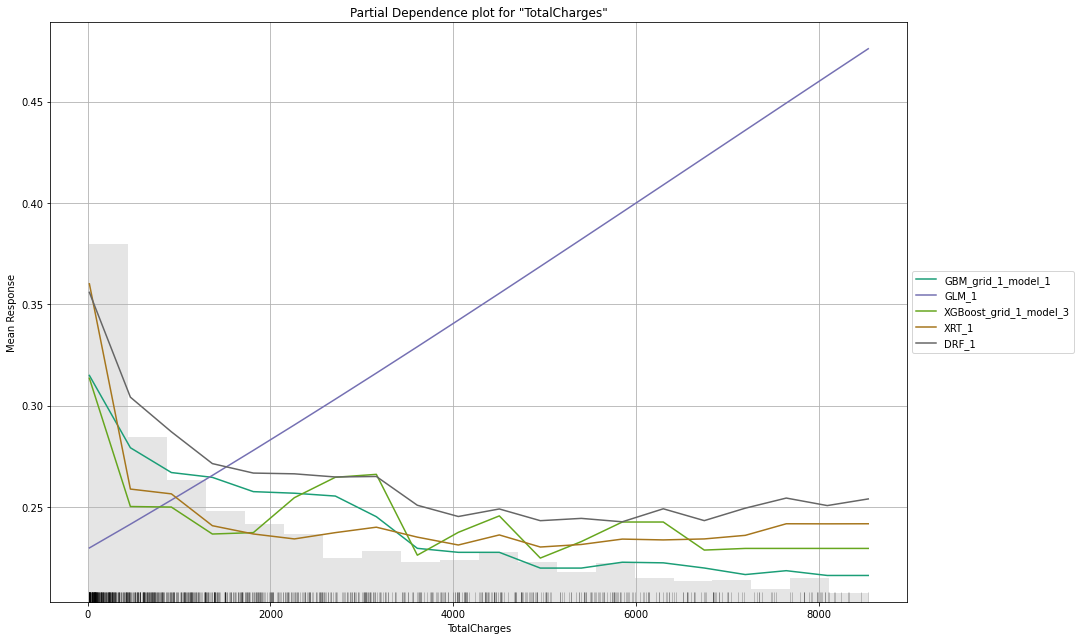

In [ ]:
exa_2 = auto_model_2.explain(test)

In [ ]:
h2o.automl.get_leaderboard(auto_model_2, extra_columns = "ALL")

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20221031_60042_model_1,0.842976,0.414669,0.636674,0.240887,0.367944,0.135383,881,0.047763,GBM
GBM_1_AutoML_3_20221031_60042,0.839469,0.417405,0.623169,0.243604,0.37042,0.137211,1037,0.024684,GBM
GLM_1_AutoML_3_20221031_60042,0.835449,0.420966,0.613311,0.243888,0.372633,0.138856,744,0.01718,GLM
XGBoost_grid_1_AutoML_3_20221031_60042_model_3,0.833335,0.426588,0.608324,0.230484,0.375354,0.14089,1418,0.015147,XGBoost
XGBoost_grid_1_AutoML_3_20221031_60042_model_1,0.833199,0.429292,0.610366,0.240427,0.376291,0.141595,834,0.014264,XGBoost
GBM_5_AutoML_3_20221031_60042,0.829655,0.429388,0.611356,0.244658,0.376551,0.141791,690,0.023665,GBM
XGBoost_1_AutoML_3_20221031_60042,0.828657,0.437938,0.592713,0.245644,0.379249,0.143829,1358,0.01251,XGBoost
GBM_2_AutoML_3_20221031_60042,0.828627,0.431872,0.610379,0.243211,0.377826,0.142753,954,0.028347,GBM
XRT_1_AutoML_3_20221031_60042,0.827268,0.430024,0.616174,0.249565,0.376068,0.141427,1753,0.03531,DRF
GBM_3_AutoML_3_20221031_60042,0.827019,0.435434,0.6148,0.249936,0.379216,0.143805,978,0.029646,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_3_20221031_60042_model_1

,No,Yes,Error,Rate
No,538.0,197.0,0.268,(197.0/735.0)
Yes,49.0,243.0,0.1678,(49.0/292.0)
Total,587.0,440.0,0.2395,(246.0/1027.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

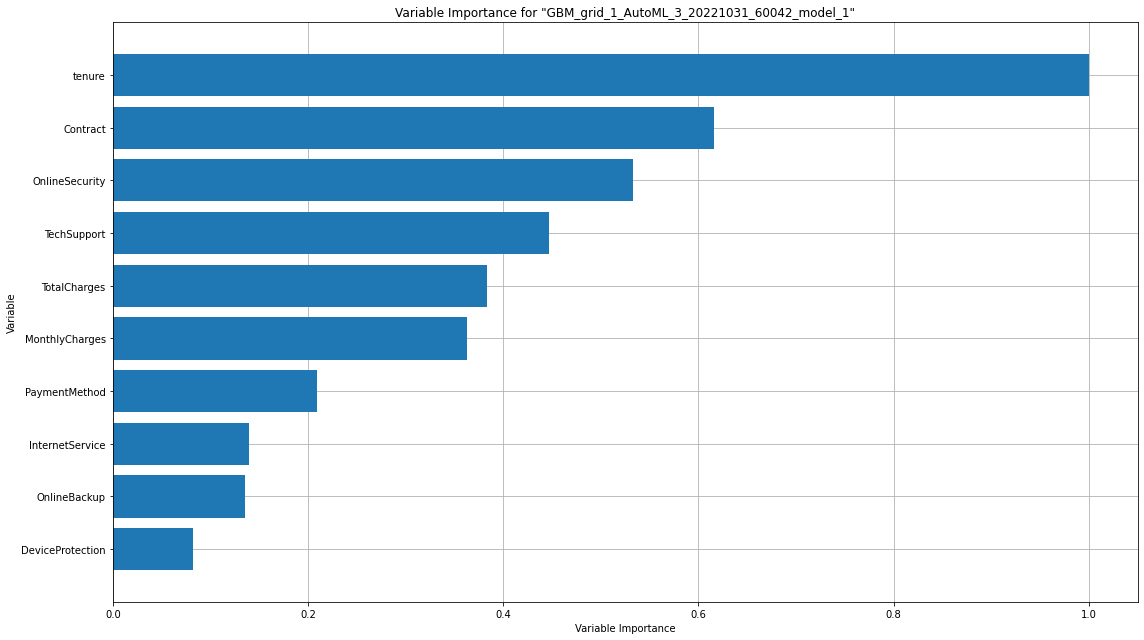

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

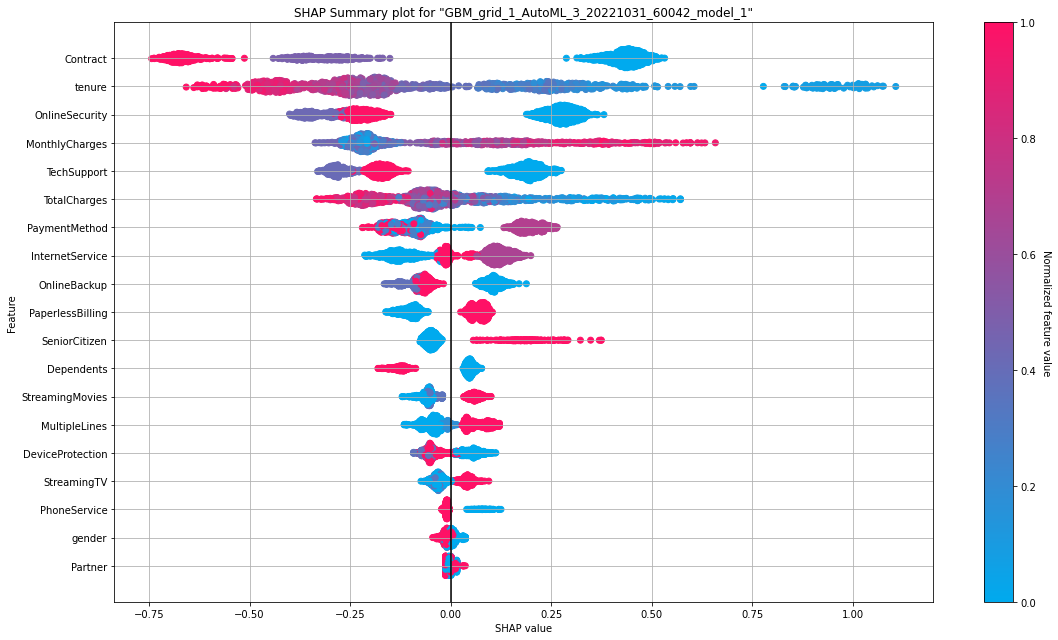

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

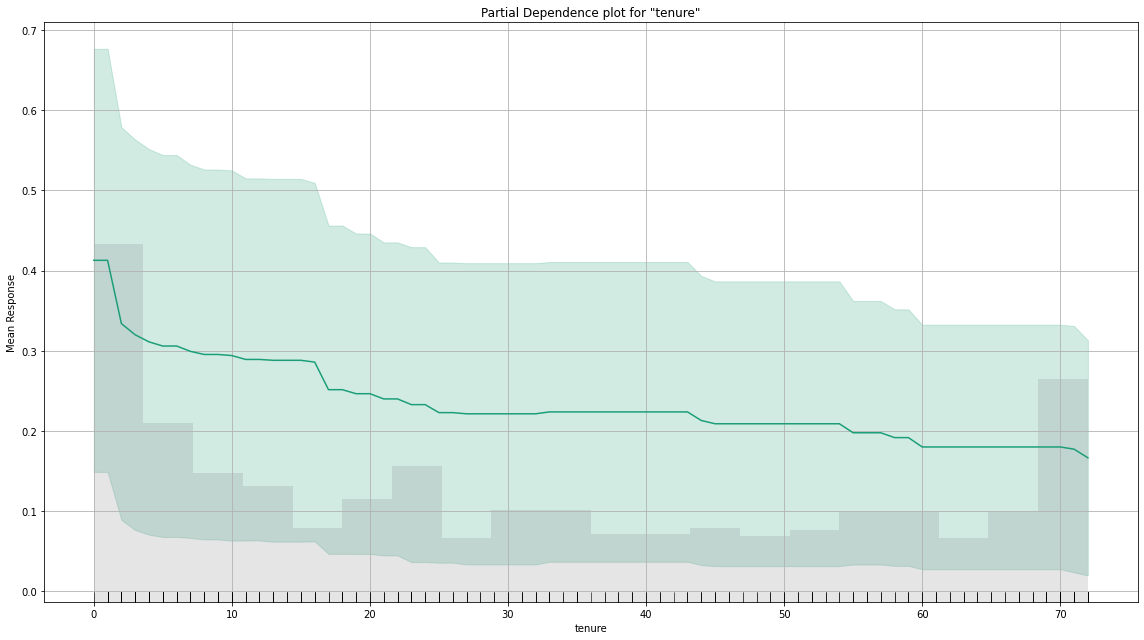

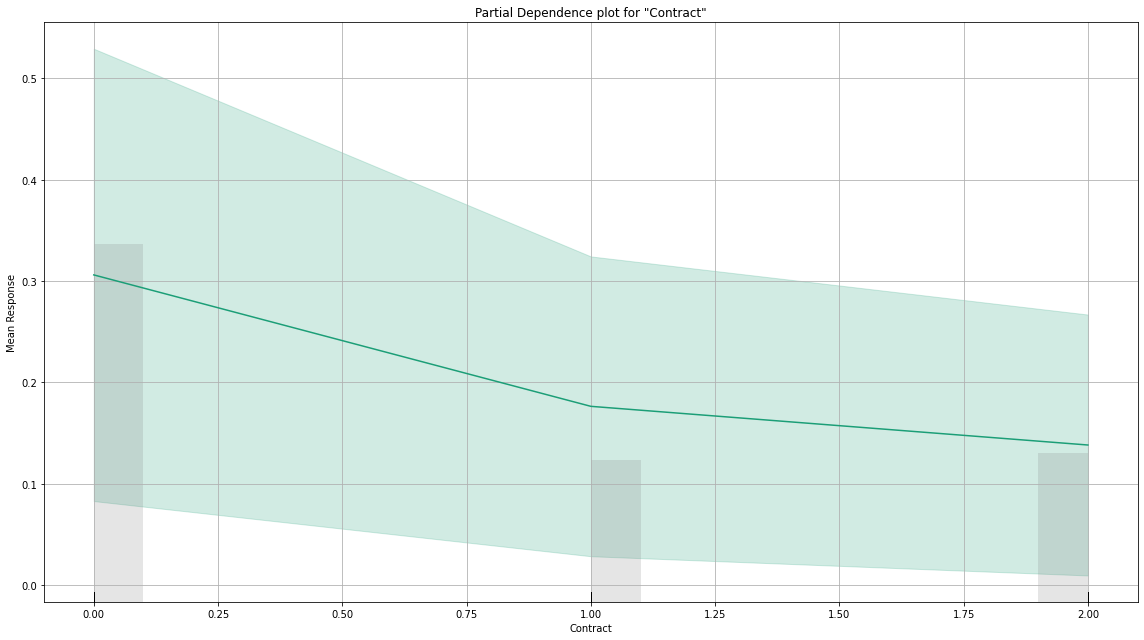

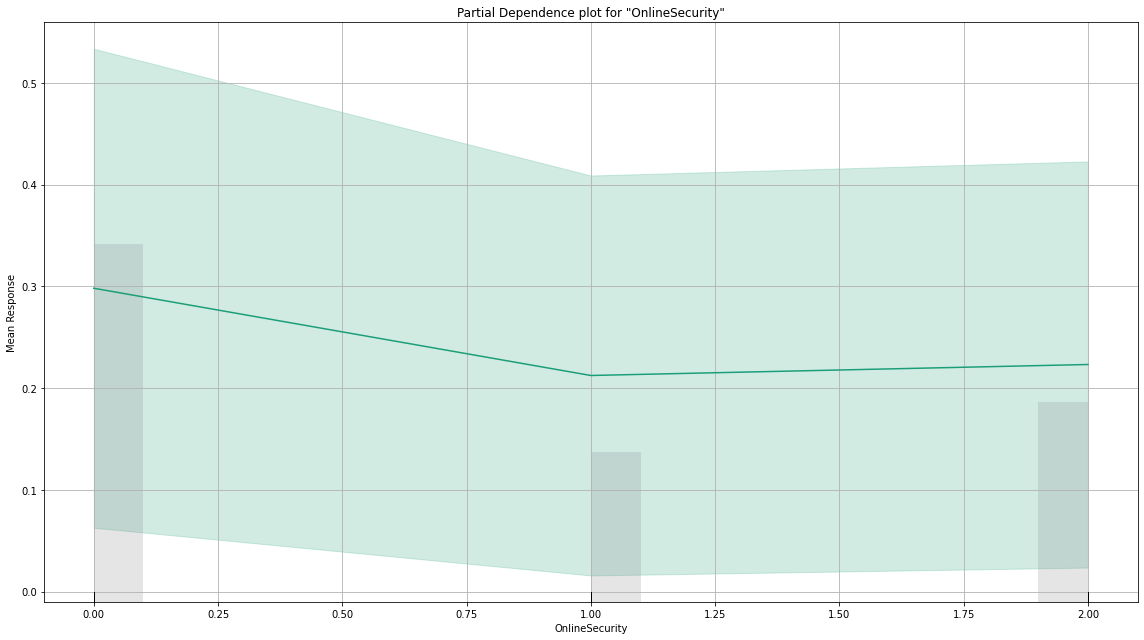

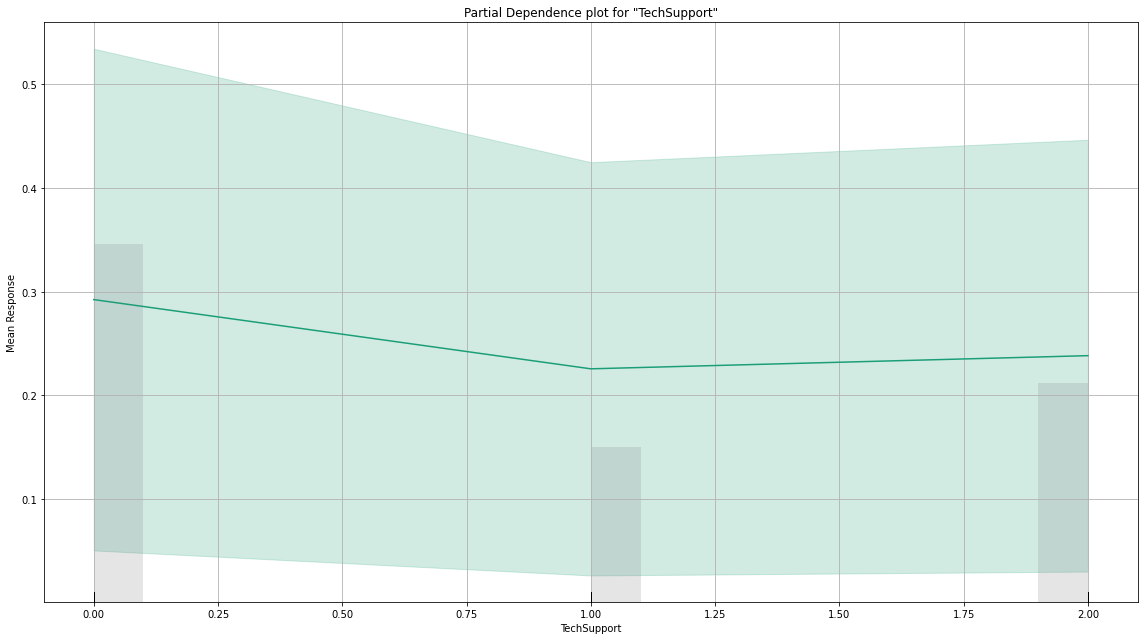

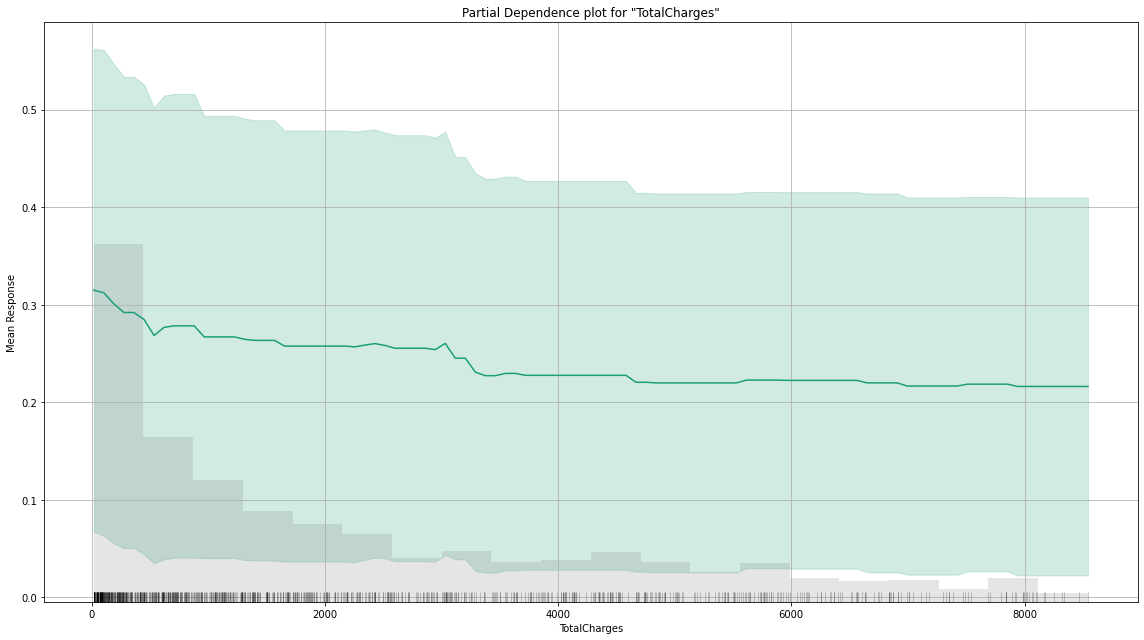

In [ ]:
exa_leader = auto_model_2.leader.explain(test)

# Customer Segmentation Analysis using K-Means Clustering

In [ ]:
new_churn_df = h2o.deep_copy(churn_df, 'new_churn_df') #Create a new copy for churn_df

In [ ]:
new_churn_df.drop('Churn')

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


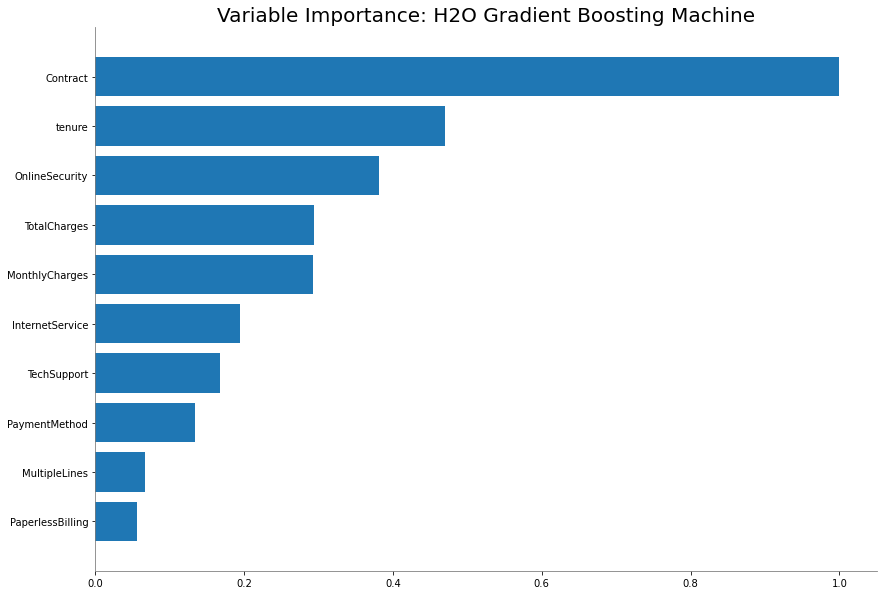

<Figure size 432x288 with 0 Axes>

In [ ]:
# Showcasing variable importance from model.explain() to know the top features for segmentation
va_plot = auto_model.leader.varimp_plot()

In [ ]:
new_churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
predictors = ["tenure", "MonthlyCharges", "TotalCharges"]
seg_train, seg_valid = new_churn_df.split_frame(ratios=[.8], seed = 1234)

In [ ]:
customer_kmeans = H2OKMeansEstimator(k=10, estimate_k=True, standardize = False, seed=1234) 

In [ ]:
#training the model
customer_kmeans.train(x=predictors, training_frame=seg_train, validation_frame=seg_valid)

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OKMeansEstimator : K-means
Model Key: KMeans_model_python_1667195416826_689


Model Summary: 
    number_of_rows    number_of_clusters    number_of_categorical_columns    number_of_iterations    within_cluster_sum_of_squares    total_sum_of_squares    between_cluster_sum_of_squares
--  ----------------  --------------------  -------------------------------  ----------------------  -------------------------------  ----------------------  --------------------------------
    5663              5                     0                                40                      1.13622e+09                      2.93422e+10             2.8206e+10

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 1120148763.65305
Total Sum of Square Error to Grand Mean: 29342236949.00457
Between Cluster Sum of Square Error: 28222088185.35152

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           2475    2.71791e+08
    2           1304    2.99827e+08
    3           797     2.28694e+08
    4           669     1.84039e+08
    5           418     1.35798e+08

ModelMetricsClustering: kmeans
** Reported on validation data. **

Total Within Cluster Sum of Square Error: 270569958.8824209
Total Sum of Square Error to Grand Mean: 6787039227.776441
Between Cluster Sum of Square Error: 6516469268.89402

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           625     7.30288e+07
    2           320     6.6695e+07
    3           197     5.61141e+07
    4           145     4.15558e+07
    5           93      3.31761e+07

Scoring History: 
     timestamp            duration    iterations    number_of_clusters    number_of_reassigned_observations    within_cluster_sum_of_squares
---  -------------------  ----------  ------------  --------------------  -----------------------------------  -------------------------------
     2022-10-31 06:45:08  0.008 sec   0.0           0.0                   nan                                  nan
     2022-10-31 06:45:08  0.036 sec   1.0           1.0                   5663.0                               246792808495.0932
     2022-10-31 06:45:08  0.039 sec   2.0           1.0                   0.0                                  29342236880.24899
     2022-10-31 06:45:08  0.048 sec   3.0           2.0                   262.0                                6868126666.6132965
     2022-10-31 06:45:08  0.053 sec   4.0           2.0                   95.0                                 6530943703.503502
     2022-10-31 06:45:08  0.057 sec   5.0           2.0                   53.0                                 6475357979.946951
     2022-10-31 06:45:08  0.061 sec   6.0           2.0                   22.0                                 6459867176.26614
     2022-10-31 06:45:08  0.066 sec   7.0           2.0                   10.0                                 6457093503.869089
     2022-10-31 06:45:08  0.070 sec   8.0           2.0                   6.0                                  6456514961.544497
     2022-10-31 06:45:08  0.074 sec   9.0           2.0                   2.0                                  6456351511.4521475
---  ---                  ---         ---           ---                   ---                                  ---
     2022-10-31 06:45:08  0.178 sec   31.0          5.0                   179.0                                1463720645.9232643
     2022-10-31 06:45:08  0.183 sec   32.0          5.0                   149.0                                1387895498.358083
     2022-10-31 06:45:08  0.187 sec   33.0          5.0                   147.0                                1339282082.6119387
     2022-10-31 06:45:08  0.190 sec   34.0          5.0                   147.0                                1298284858.564719
     2022-10

In [ ]:
#performance evaluation
perf = customer_kmeans.model_performance()
pred = customer_kmeans.predict(seg_valid)

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


In [ ]:
perf

,centroid,size,within_cluster_sum_of_squares
,1.0,2475.0,271790935.0711387
,2.0,1304.0,299827297.2235774
,3.0,797.0,228693724.8970547
,4.0,669.0,184039052.4953136
,5.0,418.0,135797753.9659656


In [ ]:
pred

predict
1
2
1
4
0
1
0
0
3
0
